# Seaborn Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Iris Data

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


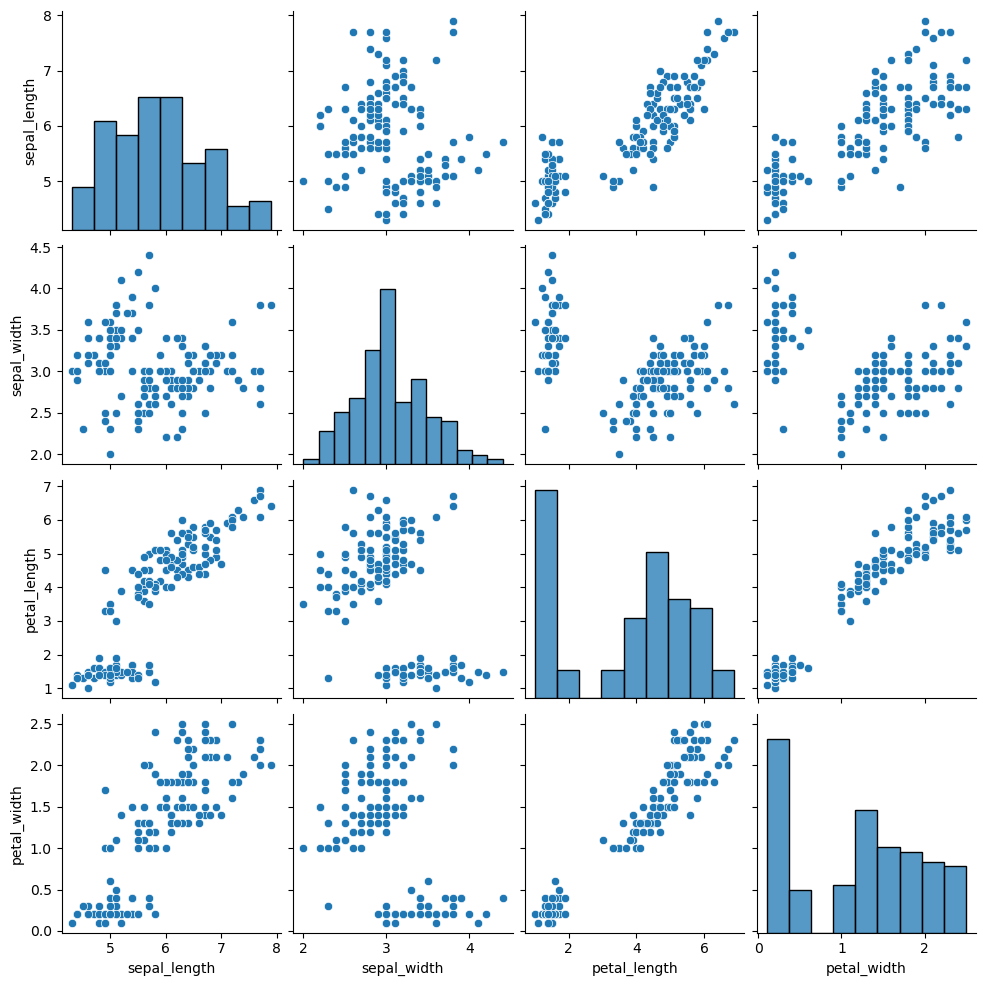

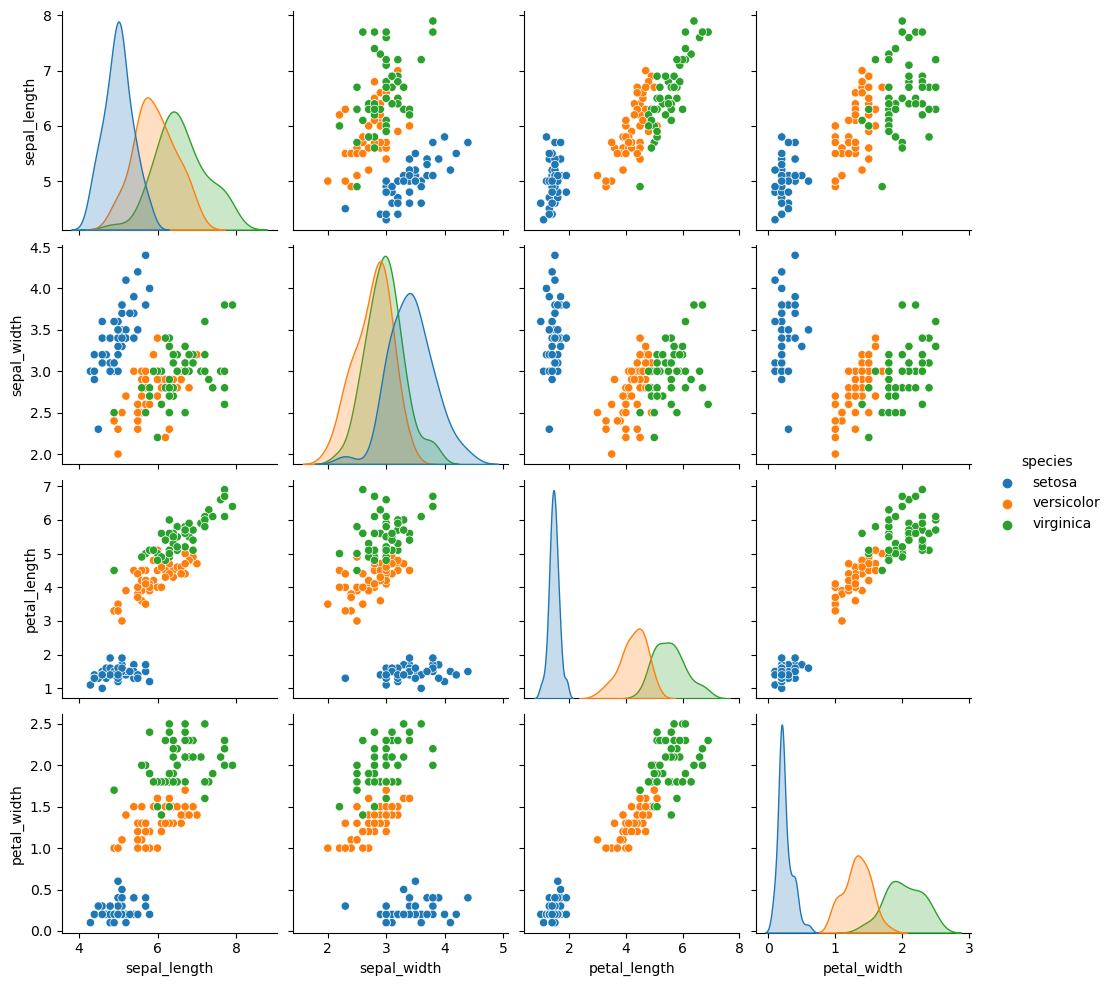

In [4]:
sns.pairplot(iris)
sns.pairplot(hue='species', data=iris)

In [5]:
plt.show()

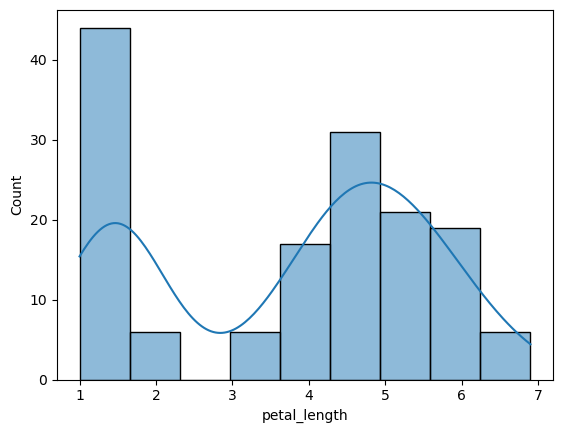

In [6]:
# What does the distribution of petal lengths look like?
sns.histplot(iris.petal_length, kde=True)
plt.show()

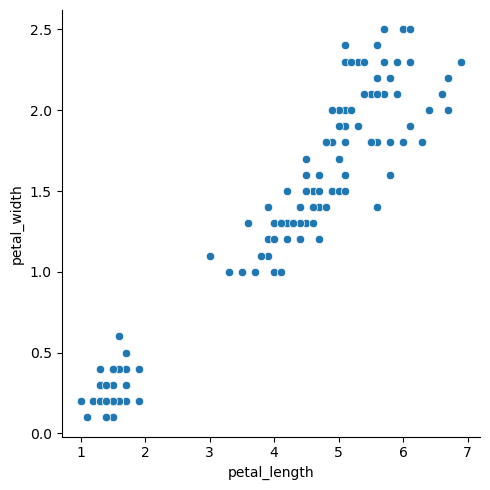

In [7]:
# Is there a relationship between petal length and petal width?
sns.relplot(x='petal_length', y='petal_width', data=iris)
plt.show()

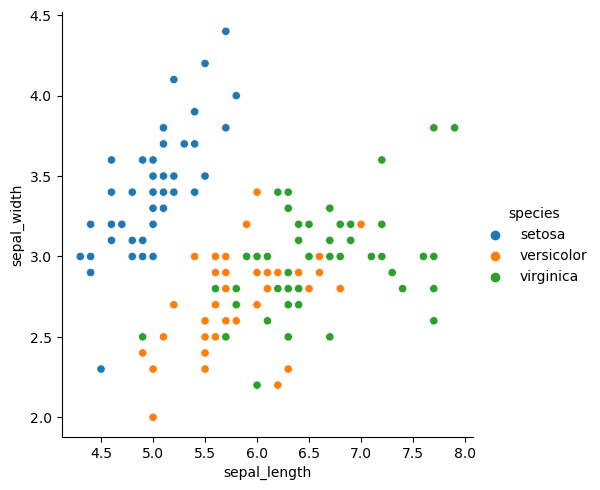

In [8]:
# Would it be reasonable to predict species based on sepal
# width and sepal length? For this, you'll visualize two
# numeric columns through the lense of a categorical column.
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

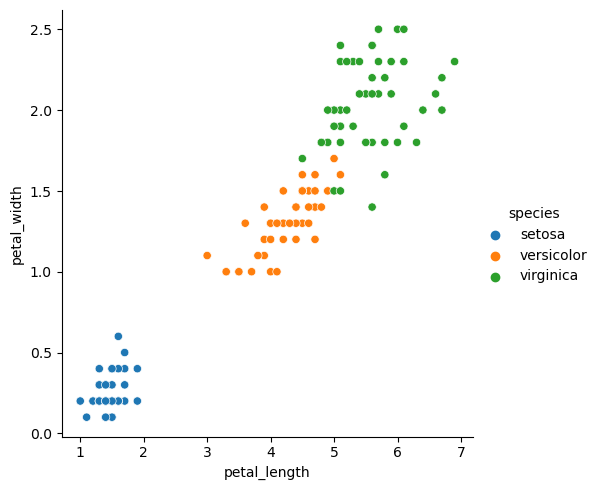

In [9]:
# Which features would be best used to predict species?
sns.relplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.show()

### anscombe data

1. Load the `anscombe` dataset from seaborn. Use pandas to group the data by the `dataset` column, and calculate summary statistics for each dataset. What do you notice?
- Plot the x and y values from the `anscombe` data. Each dataset should be in a separate column.

In [29]:
ac = sns.load_dataset('anscombe')

In [30]:
ac.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

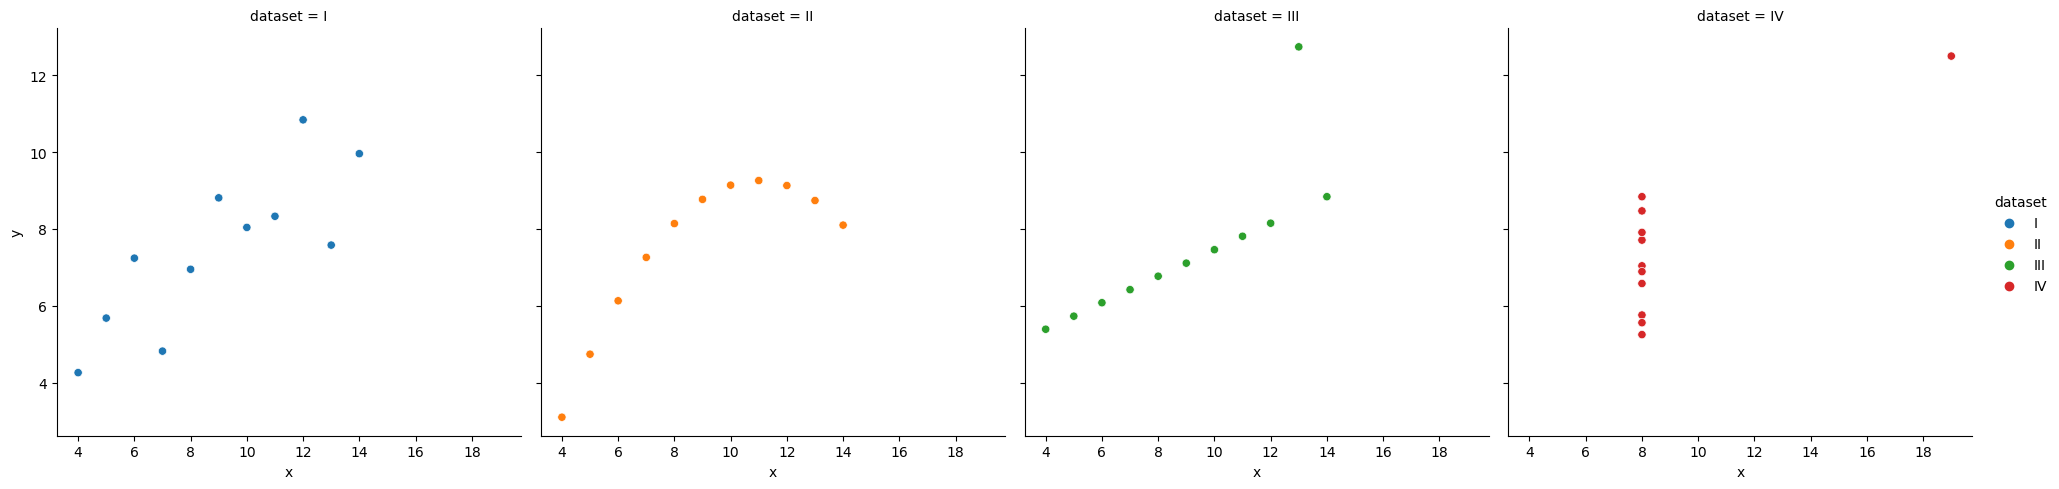

In [160]:
sns.relplot(data=ac, x='x', y='y', hue='dataset', col='dataset')
plt.show()

2. Load the `InsectSprays` dataset from pydataset and read it's documentation. Create a `boxplot` that shows the effectiveness of the different insect sprays.

In [39]:
from pydataset import data

In [44]:
# data('InsectSprays', show_doc=True)

In [45]:
insect = data('InsectSprays')
insect.sample(5)

,count,spray
68,10,F
24,13,B
58,2,E
17,16,B
46,5,D


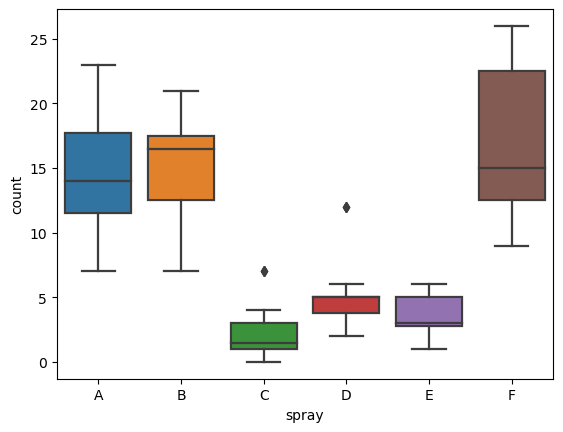

In [48]:
sns.boxplot(data=insect, x='spray', y='count')
plt.show()

3. Load the `swiss` dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:
- Create an attribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [ ]:
# data('swiss',show_doc=True)

In [69]:
swiss = data('swiss').reset_index()
swiss = swiss.rename(columns={'index':'Province'})
swiss.sample(5)

,Province,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
29,Yverdon,65.4,49.5,15,8,6.10,22.5
22,Nyone,56.6,50.9,22,12,15.14,16.7
34,Monthey,79.4,64.9,7,3,98.22,20.2
12,Aubonne,66.9,67.5,14,7,2.27,19.1
46,Rive Gauche,42.8,27.7,22,29,58.33,19.3


In [70]:
is_catholic = swiss.Catholic>50

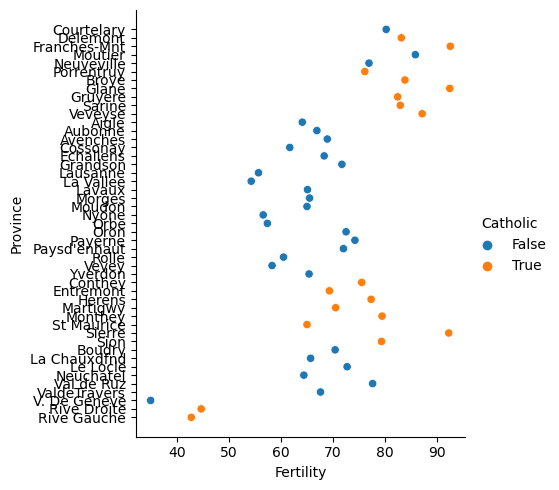

In [74]:
sns.relplot(data=swiss, y='Province', x='Fertility', hue=is_catholic)
plt.show()

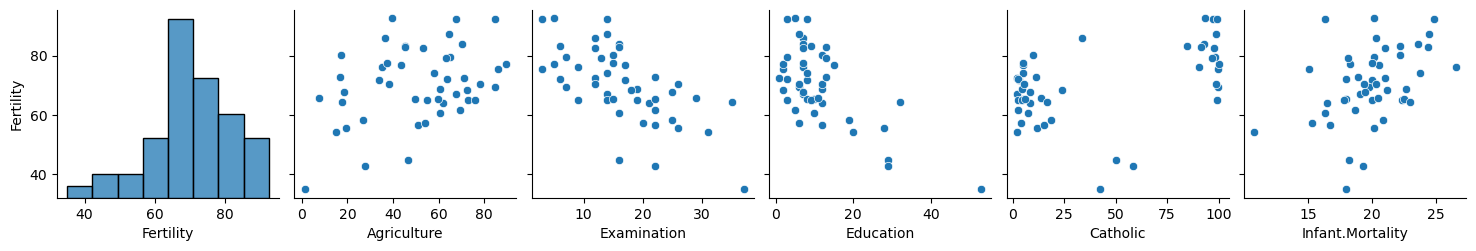

In [95]:
sns.pairplot(data=swiss, y_vars='Fertility')
plt.show()

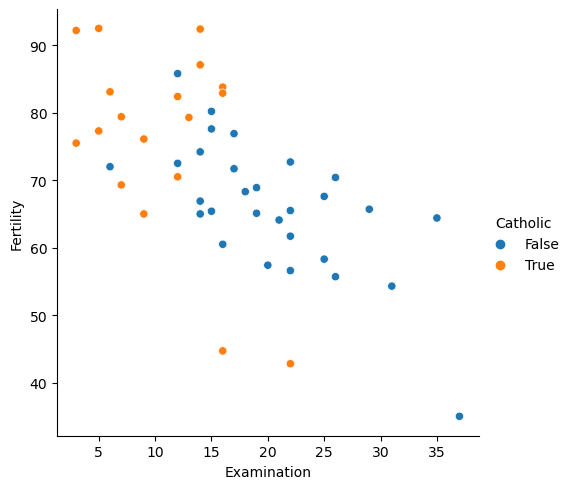

In [162]:
sns.relplot(data=swiss, x='Examination', y='Fertility', hue=is_catholic)
plt.show()

4. Load the `chipotle` dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [168]:
from env import get_db_url
chipotle = pd.read_sql('select * from orders', get_db_url('chipotle'))
chipotle.sample(5)

,id,order_id,quantity,item_name,choice_description,item_price
4072,4073,1630,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$8.75
390,391,169,1,Steak Soft Tacos,"[Fresh Tomato Salsa, [Cheese, Sour Cream]]",$9.25
400,401,174,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Lettuce, Guacamole]]",$11.25
1133,1134,468,1,Steak Bowl,"[Tomatillo Green Chili Salsa, [Rice, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettu...",$11.75
115,116,51,1,Barbacoa Bowl,"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Pinto...",$8.99


In [169]:
chipotle.item_price=(chipotle.item_price.str.replace('$','', regex=False)).astype(float)

In [122]:
chips = chipotle[chipotle.item_name.isin(list(chipotle.item_name.value_counts().nlargest(4).index))]

In [127]:
chip = pd.DataFrame(chips.groupby('item_name').item_price.sum().sort_values(ascending=False)).reset_index()
chip

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


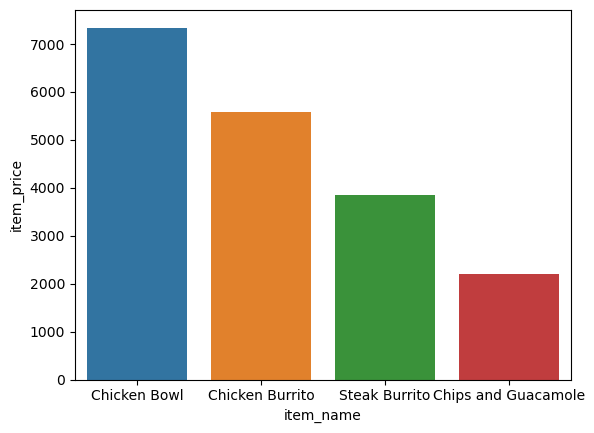

In [136]:
sns.barplot(data=chip, x='item_name', y='item_price')
plt.show()

5. Load the `sleepstudy` dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominent line showing the average change in reaction time.

In [139]:
# data('sleepstudy', show_doc=True)

In [138]:
slp = data('sleepstudy')
slp.sample(5)

,Reaction,Days,Subject
94,346.1222,3,337
69,333.3600,8,333
129,321.5418,8,351
125,271.8274,4,351
17,213.6303,6,309


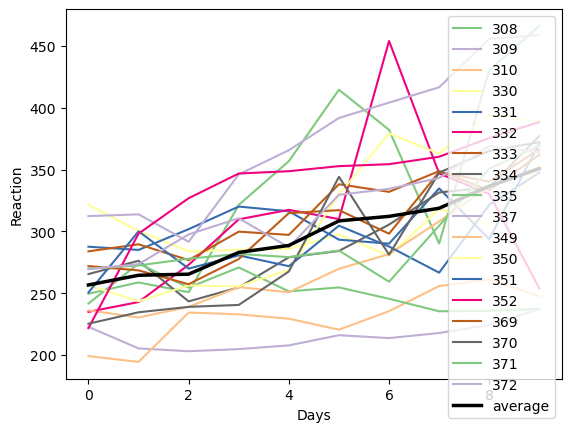

In [166]:
sns.lineplot(data=slp, x='Days', y='Reaction', hue='Subject', palette='Accent')
sns.lineplot(x="Days", y="Reaction", data=slp, color="black", ci=None, linewidth=2.5, label='average')
plt.show()